In [1]:
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')


C:\Python\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
df=pd.read_csv("telecom_churn_data.csv")

In [3]:
df.shape

(99999, 226)

In [4]:
HTML(df.head().to_html())

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
df=df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'})

In [6]:
# columns we need to filter out high value customer are total_rech_data_6,_7,_8,_9 and total_rech_amt_6,_7,_8,_9
col=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9']

df[col].isnull().sum()/len(df[col].index)*100

total_rech_amt_6      0.000000
total_rech_amt_7      0.000000
total_rech_amt_8      0.000000
total_rech_amt_9      0.000000
total_rech_data_6    74.846748
total_rech_data_7    74.428744
total_rech_data_8    73.660737
total_rech_data_9    74.077741
dtype: float64

In [7]:
df[col].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,2.463802,2.666419,2.651999,2.441170
std,398.019701,408.114237,416.540455,404.588583,2.789128,3.031593,3.074987,2.516339
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,1.000000,1.000000,1.000000,1.000000
50%,230.000000,220.000000,225.000000,200.000000,1.000000,1.000000,1.000000,2.000000
75%,437.500000,428.000000,434.500000,415.000000,3.000000,3.000000,3.000000,3.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,61.000000,54.000000,60.000000,84.000000


Total_rech_data has 75% of missing values.
For total_rech_data min value is 1 and 75% percentile is 3. Which is not much difference. 
Lets drop that columns as this is not giving much information

In [8]:
df=df.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'],axis=1)

In [9]:
df['avg_rech_6_7_amt']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2
print(df['avg_rech_6_7_amt'].quantile(0.70))

368.5


In [10]:
df=df.loc[(df['avg_rech_6_7_amt']>df['avg_rech_6_7_amt'].quantile(0.70))]

In [11]:
df.shape

(29979, 223)

After filtering high value customer 29.9 k rows are filtered out

In [12]:
#drop avg_rech_6_7_amt
df=df.drop(['avg_rech_6_7_amt'],axis=1)

In [13]:
df.shape

(29979, 222)

## Tag the churners and remove attributes of churn phase

Columns to check for churners 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [14]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

No missing values in above columns

In [15]:
df.loc[(df['total_ic_mou_9']==0)&(df['total_og_mou_9']==0)&(df['vol_2g_mb_9']==0)&(df['vol_3g_mb_9']==0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 7 to 99961
Columns: 222 entries, mobile_number to vbc_3g_9
dtypes: float64(175), int64(35), object(12)
memory usage: 4.4+ MB


In [16]:
# so there are around 2589 entries that are marked to be churned
df['churn']=0
df.loc[(df['total_ic_mou_9']==0)&(df['total_og_mou_9']==0)&(df['vol_2g_mb_9']==0)&(df['vol_3g_mb_9']==0),'churn']=1

In [17]:
print(" % of churn{1} and not churn{0} ")
df['churn'].value_counts()/len(df.index)*100

 % of churn{1} and not churn{0} 


0    91.363955
1     8.636045
Name: churn, dtype: float64

Only 8.6% of the data is churn . Data is highly imbalanced.

In [18]:
#attributes of churn phase
col_9=[x for x in df.columns if '_9' in x]
print(col_9)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9']


In [19]:
df=df.drop(col_9,axis=1)

In [20]:
df.shape

(29979, 169)

### Analyse feature variable 


Creating function to get mean of variables for  churn and not chrun customer 

In [21]:
# identify rech columns 
rech_col=df.columns[df.columns.str.contains('rech_amt')]
#check for null values
rech_col

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [22]:
def get_mean(cols):
    mean_6=[df[df['churn']==x][cols[0]].mean() for x in [0,1]]
    mean_7=[df[df['churn']==x][cols[1]].mean() for x in [0,1]]
    mean_8=[df[df['churn']==x][cols[2]].mean() for x in [0,1]]

    return pd.DataFrame(np.column_stack([mean_6,mean_7,mean_8]),
                        columns=['mean_6','mean_7','mean_8'])
    

In [23]:
# get mean of total_rech_amt_6,7,8 months
get_mean(rech_col[0:3])

,mean_6,mean_7,mean_8
0,687.196386,701.780248,647.464951
1,809.055620,638.427578,258.901120


In [24]:
# get mean of max_rech_amt
get_mean(rech_col[3:6])

,mean_6,mean_7,mean_8
0,171.920811,177.521103,170.368821
1,166.713789,156.700270,84.224411


In [25]:
# get mean of av_rech_amt_data_6,7,8
get_mean(rech_col[6:9])

,mean_6,mean_7,mean_8
0,239.806563,251.963936,231.678535
1,227.851877,236.589748,151.419052


From above datafram it is oserved that mean of reach_amt is decreased in month 8 for churn customer

In [26]:
# derive new variable on the bases of good phase (month 6_7)
df['total_rech_amt_6_7']=(df.total_rech_amt_6+df.total_rech_amt_7)/2
df['max_rech_amt_6_7']=(df.max_rech_amt_6+df.max_rech_amt_7)/2
df['av_rech_amt_data_6_7']=(df.av_rech_amt_data_6+df.av_rech_amt_data_7)/2

#dropping original columns for 6_7 month
df=df.drop(['total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7',
            'av_rech_amt_data_6','av_rech_amt_data_7'],axis=1)


In [27]:
df.shape

(29979, 166)

In [28]:
# check column  last_day_rech_amt
day_col=df.columns[df.columns.str.contains("last_day_rch")]
# get mean of last_day_rch_amt columns for 6,7,8 months
get_mean(day_col)


,mean_6,mean_7,mean_8
0,104.866959,107.797262,101.467652
1,101.299343,78.919660,34.424488


In [29]:
# deriving new column for last_day_rech_amt
df['last_day_rch_amt_6_7']=(df.last_day_rch_amt_6+df.last_day_rch_amt_7)/2
df=df.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1)

In [30]:
# check total_rech_num,count_rech_2g, count_rech_3g column
rech_num=df.columns[df.columns.str.contains('total_rech_num|count_rech_2g|count_rech_3g')]
#get missing value count for these columns
(df[rech_num].isnull().sum()/len(df[rech_num].index))*100


total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
count_rech_2g_6     62.016745
count_rech_2g_7     61.132793
count_rech_2g_8     60.835918
count_rech_3g_6     62.016745
count_rech_3g_7     61.132793
count_rech_3g_8     60.835918
dtype: float64

In [31]:
# check for distribution for these columns
df[rech_num].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
count,29979.000000,29979.000000,29979.000000,11387.000000,11652.000000,11741.000000,11387.000000,11652.000000,11741.000000
mean,12.123253,11.914207,10.226092,1.644858,1.848095,1.842518,0.821727,0.863543,0.801295
std,9.546424,9.605757,9.480012,2.491718,2.739343,2.621914,1.604493,1.762361,1.748677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,9.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,15.000000,15.000000,13.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,307.000000,138.000000,196.000000,39.000000,48.000000,44.000000,29.000000,35.000000,45.000000


Lets impute missing vlaues with 0 , considering that no recharge has been done for data.
Also it is observed that mean of count_rech_2g|3g is approx 1.

In [32]:
#impute missing value with 0
df[rech_num]=df[rech_num].fillna(0)

In [33]:
#derive new columns 
df['total_rech_num_6_7']=(df.total_rech_num_6+df.total_rech_num_7)/2
df['count_rech_2g_6_7']=(df.count_rech_2g_6+df.count_rech_2g_7)/2
df['count_rech_3g_6_7']=(df.count_rech_3g_6+df.count_rech_3g_7)/2
df=df.drop(['total_rech_num_6','total_rech_num_7','count_rech_2g_6',
            'count_rech_2g_7','count_rech_3g_6','count_rech_3g_7'],axis=1)

In [34]:
#let check vol of 2g_mb and 3g_mb
vol_mb=df.columns[df.columns.str.contains('2g_mb|3g_mb')]
df[vol_mb].isnull().sum()

vol_2g_mb_6    0
vol_2g_mb_7    0
vol_2g_mb_8    0
vol_3g_mb_6    0
vol_3g_mb_7    0
vol_3g_mb_8    0
dtype: int64

In [35]:
#get mean of vol_2g
get_mean(vol_mb[0:3])

,mean_6,mean_7,mean_8
0,80.577233,80.944285,74.347547
1,60.869486,49.130182,15.306798


In [36]:
#get mean of vol_3g
get_mean(vol_mb[3:6])

,mean_6,mean_7,mean_8
0,265.233968,289.720365,290.213208
1,188.686531,157.957922,56.864600


There is a significant drop in vol 2g & 3g usage for churn customer.

In [37]:
#driving new variables 
df['vol_2g_mb_6_7']=(df[vol_mb[0]]+df[vol_mb[1]])/2
df['vol_3g_mb_6_7']=(df[vol_mb[3]]+df[vol_mb[4]])/2
df=df.drop(vol_mb[[0,1,3,4]],axis=1)

In [38]:
# lets check for monthly 2g and 3g user 
monthly=df.columns[df.columns.str.contains('monthly_2g|monthly_3g')]
# check for missing values 
df[monthly].isnull().sum()

monthly_2g_6    0
monthly_2g_7    0
monthly_2g_8    0
monthly_3g_6    0
monthly_3g_7    0
monthly_3g_8    0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

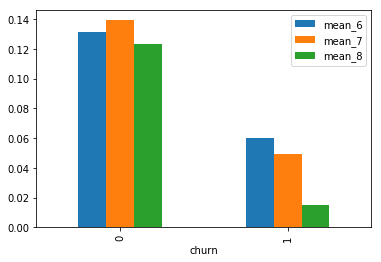

In [39]:
# get the mean of monthly_2g variavble
df_1=get_mean(monthly[0:3])
df_1['churn']=[0,1]
df_1.plot.bar(y=['mean_6','mean_7','mean_8'],x='churn')
plt.show

In [40]:
#get mean of monthly 3g variable
get_mean(monthly[3:6])

,mean_6,mean_7,mean_8
0,0.177766,0.193173,0.186491
1,0.134801,0.101970,0.033990


We see drop in monthly subscription of churned users

In [41]:
# deriving new column for monthly_2g & monthly_3g
df['monthly_2g_6_7']=(df[monthly[0]]+df[monthly[1]])/2
df['monthly_3g_6_7']=(df[monthly[3]]+df[monthly[4]])/2
df=df.drop(monthly[[0,1,3,4]],axis=1)


In [42]:
#check for sachet 2g & 3g
sachet=df.columns[df.columns.str.contains('sachet')]
sachet

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [43]:
#get mean of sachet 2g
get_mean(sachet[:3])

,mean_6,mean_7,mean_8
0,0.505696,0.602264,0.646915
1,0.437621,0.424102,0.190807


In [44]:
#get mean of sachet 3g
get_mean(sachet[3:6])

,mean_6,mean_7,mean_8
0,0.138481,0.150894,0.149580
1,0.133642,0.144457,0.044419


Again we see that there is sgnificant drop in sachet 2g & 3g

In [45]:
#derived new column
df['sachet_2g_6_7']=(df[sachet[0]]+df[sachet[1]])/2
df['sachet_3g_6_7']=(df[sachet[3]]+df[sachet[4]])/2
df=df.drop(sachet[[0,1,3,4]],axis=1)

In [46]:
# lets check for apru(average revenue per user)
arpu=df.columns[df.columns.str.contains('arpu')]
(df[arpu].isnull().sum()/len(df[arpu].index))*100

arpu_6        0.000000
arpu_7        0.000000
arpu_8        0.000000
arpu_3g_6    62.016745
arpu_3g_7    61.132793
arpu_3g_8    60.835918
arpu_2g_6    62.016745
arpu_2g_7    61.132793
arpu_2g_8    60.835918
dtype: float64

In [47]:
# impute missing values with 0
df[arpu]=df[arpu].fillna(0)

In [48]:
# get mean of arpu 2g,3g
print("mean of arpu:  ")
print(get_mean(arpu[0:3]))
print("mean of arpu_3g: ")
print(get_mean(arpu[3:6]))
print("mean of arpu_2g: ")
print(get_mean(arpu[6:9]))

mean of arpu:  
       mean_6      mean_7      mean_8
0  578.923405  593.068613  562.660367
1  679.249638  550.874162  243.155099
mean of arpu_3g: 
      mean_6     mean_7     mean_8
0  54.832401  57.735741  55.945293
1  45.695805  36.880576  12.119235
mean of arpu_2g: 
      mean_6     mean_7     mean_8
0  50.939222  53.418341  51.271624
1  43.311433  35.729104  11.837949


From above mean it observed that churned user has drop in arpu

In [49]:
# derive new column for arpu
df['arpu_6_7']=(df['arpu_6']+df['arpu_7'])/2
df['arpu_3g_6_7']=(df[arpu[3]]+df[arpu[4]])/2
df['arpu_2g_6_7']=(df[arpu[6]]+df[arpu[7]])/2
df=df.drop(arpu[[0,1,3,4,6,7]],axis=1)

In [50]:
# let check other columns 
others=df.columns[df.columns.str.contains('vbc|fb|night_pck|others')]
others

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'vbc_3g_8',
       'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [51]:
#check for null values 
df[others].isnull().sum()

og_others_6           316
og_others_7           303
og_others_8           938
ic_others_6           316
ic_others_7           303
ic_others_8           938
night_pck_user_6    18592
night_pck_user_7    18327
night_pck_user_8    18238
fb_user_6           18592
fb_user_7           18327
fb_user_8           18238
vbc_3g_8                0
vbc_3g_7                0
vbc_3g_6                0
dtype: int64

In [52]:
#impute them with 0
df[others]=df[others].fillna(0)

In [53]:
# get the mean for others column feature
print("og_others :")
print(get_mean(others[0:3]))
print("ic_others  :")
print(get_mean(others[3:6]))
print("night_pck_user")
print(get_mean(others[6:9]))
print("fb_user:")
print(get_mean(others[9:12]))


og_others :
     mean_6    mean_7    mean_8
0  0.676503  0.037266  0.051942
1  0.869838  0.157513  0.135921
ic_others  :
     mean_6    mean_7    mean_8
0  1.201867  1.545432  1.320748
1  1.062182  0.766489  0.355010
night_pck_user
     mean_6    mean_7    mean_8
0  0.010369  0.010113  0.009894
1  0.010429  0.007339  0.003090
fb_user:
     mean_6    mean_7    mean_8
0  0.349361  0.358269  0.350529
1  0.251835  0.214368  0.088837


In [54]:
df.shape

(29979, 153)

In [55]:
# derive new columns 
df['og_others']=(df['og_others_6']+df['og_others_7'])/2
df['ic_others']=(df['ic_others_6']+df['ic_others_7'])/2
df['night_pck_user_6_7']=(df['night_pck_user_6']+df['night_pck_user_7'])/2
df['fb_user_6_7']=(df['fb_user_6']+df['fb_user_7'])/2
df['vbc_3g_6_7']=(df['vbc_3g_6']+df['vbc_3g_7'])/2
df=df.drop(others[[0,1,3,4,6,7,9,10,13,14]],axis=1)

In [56]:
#lets check for max_rech_data
max_rech=df.columns[df.columns.str.contains('max_rech_data')]
#lets check for null values
df[max_rech].isnull().sum()

max_rech_data_6    18592
max_rech_data_7    18327
max_rech_data_8    18238
dtype: int64

In [57]:
df[max_rech]=df[max_rech].fillna(0)

In [58]:
#derive new column
df['max_rech_data_6_7']=(df[max_rech[0]]+df[max_rech[1]])/2
df=df.drop(max_rech[0:2],axis=1)

In [59]:
#lets check mou variable
mou=df.columns[df.columns.str.contains('mou')]
# check for missing variables
(df[mou].isnull().sum()/len(df[mou].index))*100

loc_og_t2o_mou      0.380266
std_og_t2o_mou      0.380266
loc_ic_t2o_mou      0.380266
onnet_mou_6         1.054071
onnet_mou_7         1.010707
onnet_mou_8         3.128857
offnet_mou_6        1.054071
offnet_mou_7        1.010707
offnet_mou_8        3.128857
roam_ic_mou_6       1.054071
roam_ic_mou_7       1.010707
roam_ic_mou_8       3.128857
roam_og_mou_6       1.054071
roam_og_mou_7       1.010707
roam_og_mou_8       3.128857
loc_og_t2t_mou_6    1.054071
loc_og_t2t_mou_7    1.010707
loc_og_t2t_mou_8    3.128857
loc_og_t2m_mou_6    1.054071
loc_og_t2m_mou_7    1.010707
loc_og_t2m_mou_8    3.128857
loc_og_t2f_mou_6    1.054071
loc_og_t2f_mou_7    1.010707
loc_og_t2f_mou_8    3.128857
loc_og_t2c_mou_6    1.054071
loc_og_t2c_mou_7    1.010707
loc_og_t2c_mou_8    3.128857
loc_og_mou_6        1.054071
loc_og_mou_7        1.010707
loc_og_mou_8        3.128857
                      ...   
loc_ic_t2f_mou_6    1.054071
loc_ic_t2f_mou_7    1.010707
loc_ic_t2f_mou_8    3.128857
loc_ic_mou_6  

Since there are very less % of missing values, lets impute them with 0 , considering that customer hasn't used that services.

In [60]:
# impute missing values with zero 
df[mou]=df[mou].fillna(0)

In [61]:
# find out the columns which have only low variance 
low_var=df[mou].std()[df[mou].std()==0]
low_var

loc_og_t2o_mou      0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
std_og_t2c_mou_6    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_ic_t2o_mou_6    0.0
std_ic_t2o_mou_7    0.0
std_ic_t2o_mou_8    0.0
dtype: float64

In [62]:
#dropping zero variance mou columns
df=df.drop(low_var.index,axis=1)
mou=mou.drop(low_var.index)

As we have seen above same trend is going to follow for mou colums that churned customers have low usage in month 8

In [63]:
mou_1=set([x[:-2] for x in mou if x[-1] in ['6','7','8']])
mou_1

{'isd_ic_mou',
 'isd_og_mou',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'offnet_mou',
 'onnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_ic_mou',
 'total_og_mou'}

In [64]:
# derive new variable for mou
for var in mou_1:
    df[var+'_6_7']=(df[var+'_6']+df[var+'_7'])/2

In [65]:
# mou columns of 6_7 months should be droped
mou_drop=[x for x in mou if x[-1] in ['6','7']]
df=df.drop(mou_drop,axis=1)

In [66]:
#dropping  circle id , last_date_of_month columns as these doesn't provide any information
df=df.drop(['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [67]:
# sub 30 days from aon since we have removed month 9 
df['aon']=df['aon']-30

We see that there date of last recharge has some null value , which means that user hasn't recharge in that month
so we will just create binary values{1 & 0}  that user has done recharge in that month 

In [68]:
# create new feature where 1 mean user has done recharge 0 means user hasn't done recharge.
df['rech_6'],df['rech_7'],df['rech_8']=1,1,1
df['rech_data_6'],df['rech_data_7'],df['rech_data_8']=1,1,1
df.loc[df['date_of_last_rech_6'].isnull(),'rech_6']=0
df.loc[df['date_of_last_rech_7'].isnull(),'rech_7']=0
df.loc[df['date_of_last_rech_8'].isnull(),'rech_8']=0
df.loc[df['date_of_last_rech_data_6'].isnull(),'rech_data_6']=0
df.loc[df['date_of_last_rech_data_7'].isnull(),'rech_data_7']=0
df.loc[df['date_of_last_rech_data_8'].isnull(),'rech_data_8']=0

In [69]:
df=df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1)

In [70]:
# derive new columns for rech_6 , 7 ,8 and rech_data 6,7,8
df['rech_6_7']=(df['rech_6']+df['rech_7'])/2
df['rech_data_6']=(df['rech_data_6']+df['rech_data_7'])/2
df=df.drop(['rech_6','rech_7','rech_data_6','rech_data_7'],axis=1)

In [71]:
for col in df.columns:
    print(col , df[col].dtype,df[col].isnull().sum())

mobile_number int64 0
arpu_8 float64 0
onnet_mou_8 float64 0
offnet_mou_8 float64 0
roam_ic_mou_8 float64 0
roam_og_mou_8 float64 0
loc_og_t2t_mou_8 float64 0
loc_og_t2m_mou_8 float64 0
loc_og_t2f_mou_8 float64 0
loc_og_t2c_mou_8 float64 0
loc_og_mou_8 float64 0
std_og_t2t_mou_8 float64 0
std_og_t2m_mou_8 float64 0
std_og_t2f_mou_8 float64 0
std_og_mou_8 float64 0
isd_og_mou_8 float64 0
spl_og_mou_8 float64 0
og_others_8 float64 0
total_og_mou_8 float64 0
loc_ic_t2t_mou_8 float64 0
loc_ic_t2m_mou_8 float64 0
loc_ic_t2f_mou_8 float64 0
loc_ic_mou_8 float64 0
std_ic_t2t_mou_8 float64 0
std_ic_t2m_mou_8 float64 0
std_ic_t2f_mou_8 float64 0
std_ic_mou_8 float64 0
total_ic_mou_8 float64 0
spl_ic_mou_8 float64 0
isd_ic_mou_8 float64 0
ic_others_8 float64 0
total_rech_num_8 int64 0
total_rech_amt_8 int64 0
max_rech_amt_8 int64 0
last_day_rch_amt_8 int64 0
max_rech_data_8 float64 0
count_rech_2g_8 float64 0
count_rech_3g_8 float64 0
av_rech_amt_data_8 float64 18238
vol_2g_mb_8 float64 0
vol_3g

In [72]:
# we have missing values in av_rech_amt_data 
#lets impute them with 0 considering that customers havn't recharge 
df=df.fillna(0)

In [73]:
HTML(df.head().to_html())

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,vbc_3g_8,churn,total_rech_amt_6_7,max_rech_amt_6_7,av_rech_amt_data_6_7,last_day_rch_amt_6_7,total_rech_num_6_7,count_rech_2g_6_7,count_rech_3g_6_7,vol_2g_mb_6_7,vol_3g_mb_6_7,monthly_2g_6_7,monthly_3g_6_7,sachet_2g_6_7,sachet_3g_6_7,arpu_6_7,arpu_3g_6_7,arpu_2g_6_7,og_others,ic_others,night_pck_user_6_7,fb_user_6_7,vbc_3g_6_7,max_rech_data_6_7,offnet_mou_6_7,isd_og_mou_6_7,spl_og_mou_6_7,total_og_mou_6_7,loc_ic_t2m_mou_6_7,loc_og_t2t_mou_6_7,spl_ic_mou_6_7,std_og_t2f_mou_6_7,std_ic_t2f_mou_6_7,loc_ic_t2f_mou_6_7,loc_og_t2f_mou_6_7,roam_og_mou_6_7,loc_og_t2c_mou_6_7,onnet_mou_6_7,std_ic_mou_6_7,std_og_t2t_mou_6_7,loc_og_mou_6_7,isd_ic_mou_6_7,loc_ic_mou_6_7,roam_ic_mou_6_7,total_ic_mou_6_7,loc_ic_t2t_mou_6_7,std_ic_t2m_mou_6_7,std_og_mou_6_7,loc_og_t2m_mou_6_7,std_ic_t2t_mou_6_7,std_og_t2m_mou_6_7,rech_8,rech_data_8,rech_6_7
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,772,57.74,1,1185.0,1185.0,0.0,0.0,5.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,1209.5150,0.0,0.0,0.000,15.465,0.0,0.0,19.060,0.0,510.295,0.09,2.25,548.385,219.525,41.385,0.105,13.37,43.215,126.810,58.635,18.165,0.0,56.260,176.810,13.795,478.035,8.295,391.555,24.860,592.250,45.200,109.215,68.000,378.005,24.360,40.825,1,0,1.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.0,0,3,0,0,1.0,285,21.03,0,519.0,122.0,0.0,25.0,20.0,1.0,0.0,178.0,375.475,0.5,0.0,0.5,0.0,435.4720,0.0,0.0,0.000,0.000,0.0,0.5,516.405,77.0,87.645,0.00,0.00,470.010,35.780,257.360,0.000,0.00,0.000,0.000,0.000,0.000,0.0,382.360,13.545,124.995,333.135,0.000,52.630,0.000,66.175,16.840,13.255,136.870,75.770,0.290,11.865,1,1,1.0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0.0,0,3,0,0,1.0,2577,0.00,0,380.0,110.0,0.0,80.0,5.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,349.2585,0.0,0.0,0.000,49.860,0.0,0.0,0.000,0.0,266.295,0.00,0.00,549.750,80.705,27.910,0.225,0.00,0.000,2.405,2.270,21.620,0.0,305.075,245.950,266.195,129.395,153.695,120.845,83.885,570.595,37.730,168.960,420.355,99.205,76.985,154.150,1,1,1.0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0.0,481,0.00,0,459.0,110.0,0.0,100.0,8.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,365.4220,0.0,0.0,0.000,0.000,0.0,0.0,12.170,0.0,263.015,0.00,1.63,316.410,188.250,53.885,0.000,0.00,0.255,8.695,2.240,8.870,0.0,62.260,119.860,5.235,265.775,0.000,253.345,1.415,373.210,56.385,45.880,48.990,209.640,73.715,43.750,1,0,1.0
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.

In [74]:
# dropping mobile_number
df=df.drop(['mobile_number'],axis=1)

In [75]:
df.shape

(29979, 103)

We have divided data set into 2 part good phase and action phase .
Good phase has column name end with _6 _7 which is the average of month _6 and _7. Whereas Acion phase corresponds to month _8.
Now we can start with building model on data set.

## Model building

In [76]:
Y=df.pop('churn')
X=df

In [77]:
# standardizing data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


## Split train and test data

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)


In [79]:
x_train.shape

(20985, 102)

In [80]:
# function to print out evaluation metrics
from sklearn import metrics
# Defining variable for sensitivity
sen=[]
def ev_metrics(y_test,y_pred,y_prob):
    #confusion matrix
    confusion=metrics.confusion_matrix(y_test,y_pred)
    sensitivity=confusion[1,1]/(confusion[1,0]+confusion[1,1])
    specificity=confusion[0,0]/(confusion[0,1]+confusion[0,0])
    #add sensitivity to the var sen
    sen.append(sensitivity)
    # check for precicion 
    print("confusion matrix")
    print(confusion)
    print(" precision score",metrics.precision_score(y_test,y_pred))
    print(" sensitivity ",sensitivity)
    print("specificity",specificity)
    print(" AUC score",metrics.roc_auc_score(y_test,y_prob))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,y_prob,drop_intermediate=False)
    plt.plot(fpr,tpr,label="ROC curve")
    plt.show()

### Using PCA to reduce number of components

In [81]:
from sklearn.decomposition import PCA
pca=PCA(svd_solver='randomized', random_state=42)

In [82]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

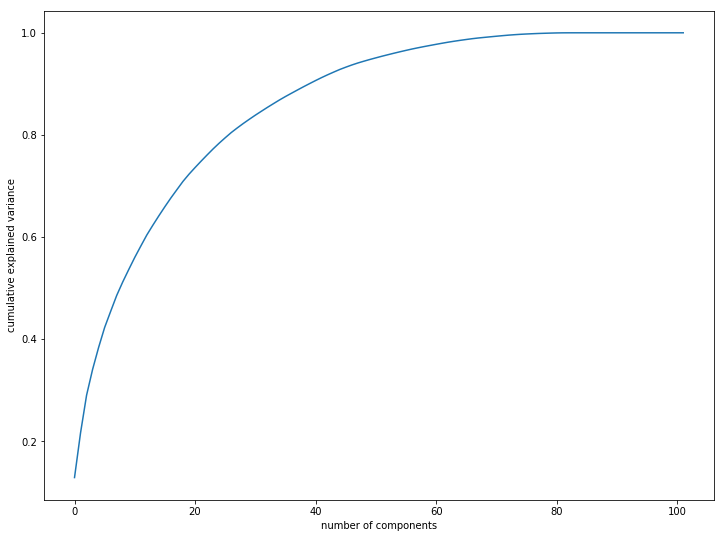

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [84]:
ls=np.cumsum(pca.explained_variance_ratio_)
for x in enumerate(ls):
    print(x)


(0, 0.129273176633727)
(1, 0.2167052548452998)
(2, 0.29037049427002914)
(3, 0.3409534510687545)
(4, 0.3840712031538955)
(5, 0.4231340264963413)
(6, 0.4547416826661197)
(7, 0.4858055380667407)
(8, 0.5121848077558215)
(9, 0.53659161858241)
(10, 0.5603344862082245)
(11, 0.5824908729892703)
(12, 0.6042202540562371)
(13, 0.6233424540641435)
(14, 0.6418264710067042)
(15, 0.6596423986788131)
(16, 0.6768376333489695)
(17, 0.6930618956404666)
(18, 0.7091389099569372)
(19, 0.7232264751937738)
(20, 0.7361436120382872)
(21, 0.7486680552636952)
(22, 0.7608473658139615)
(23, 0.7727270783727075)
(24, 0.783920163166623)
(25, 0.7944642360730622)
(26, 0.8046430661398853)
(27, 0.8137349693859712)
(28, 0.822440173672096)
(29, 0.8306865487387571)
(30, 0.8387261591246198)
(31, 0.8463687455170759)
(32, 0.8539606595374356)
(33, 0.8612321764581066)
(34, 0.8684349732742971)
(35, 0.875235379407831)
(36, 0.8816908942415868)
(37, 0.8880965237046232)
(38, 0.8944034002498588)
(39, 0.9005169845671309)
(40, 0.90653004

In [85]:
# 45 principle components explains 93.3% of variance ratio
# using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=45)

In [86]:
x_train_pca=pca_final.fit_transform(x_train)
x_train_pca.shape

(20985, 45)

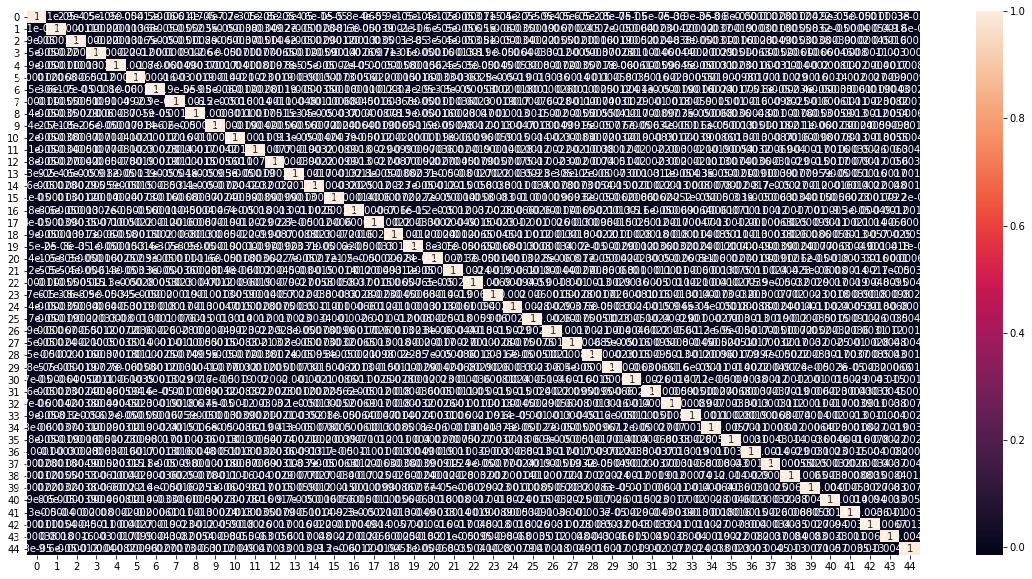

In [87]:
# creating correlation matirx for the principle components
corr_pca=np.corrcoef(x_train_pca.transpose())
# plotting correlation matrix
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(corr_pca,annot=True)

## Applying Logistic regression on Imbalanced data

In [88]:
# add model name variable
model=[]
model.append(" logistic regression-Imbalanced data)")

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr=LogisticRegression()
lr.fit(x_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
# applying Pca on test data
x_test_pca=pca_final.transform(x_test)
x_test_pca.shape

(8994, 45)

In [91]:
#making prediction on test data
y_pred_test=lr.predict(x_test_pca)

In [92]:
y_prob=lr.predict_proba(x_test_pca)[:,1]

confusion matrix
[[8082   97]
 [ 593  222]]
 precision score 0.6959247648902821
 sensitivity  0.2723926380368098
specificity 0.9881403594571464
 AUC score 0.8880997796991698


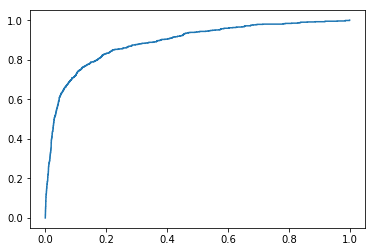

In [93]:
# print evaluation metrics
ev_metrics(y_test,y_pred_test,y_prob)

### Oversampling data using SMOTE

In [94]:
# Oversampling data by SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE(kind='regular')
x_train_pca,y_train=sm.fit_sample(x_train_pca,y_train)

In [95]:
# new x_train shape
x_train_pca.shape

(38422, 45)

## Applying Logistic regression on oversampling data


In [96]:
model.append("Logistic regression-oversampling data")

In [97]:
lr.fit(x_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
# predict model on test data
y_pred_test=lr.predict(x_test_pca)

In [99]:
# predict probability on test data 
y_prob=lr.predict_proba(x_test_pca)[:,1]
y_prob


array([0.00041349, 0.04669828, 0.08620949, ..., 0.2985199 , 0.00492259,
       0.07091072])

confusion matrix
[[6750 1429]
 [ 155  660]]
 precision score 0.31594064145524176
 sensitivity  0.8098159509202454
specificity 0.825284264580022
 AUC score 0.8889455788691224


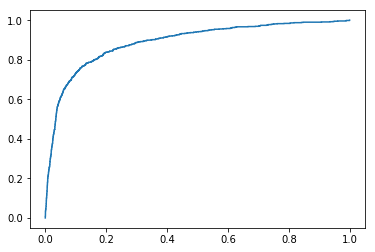

In [100]:
#print evaluation metrics
ev_metrics(y_test,y_pred_test,y_prob)

### Random forest Algorithm

In [ ]:
model.append('Random forest')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train_pca,y_train)

In [ ]:
#predicting model on test data
y_pred_test=rf.predict(x_test_pca)
#y_pred_test=model_rf.predict(x_test_pca)

In [ ]:
y_prob=rf.predict_proba(x_test_pca)[:,1]

In [ ]:
ev_metrics(y_test,y_pred_test,y_prob)

Random forest didn't work very well , as we are getting low auc score and apecificity 

### Gradient Boosting Model

In [ ]:
model.append("Gradient boosting")

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameter grid for learning rate and subsample 
param_grid={"learning_rate":[0.1,0.2,0.4],
           "subsample":[0.3,0.6,0.9]}
gbc=GradientBoostingClassifier(max_depth=2,n_estimators=200)

In [ ]:
folds=3
grid_search_gbc=GridSearchCV(gbc,cv=folds,param_grid=param_grid,
                            scoring='f1',return_train_score=True,
                            verbose=1,n_jobs=3)
grid_search_gbc.fit(x_train_pca,y_train)

In [ ]:
#check for best parameters
best_param=grid_search_gbc.best_params_
best_param

In [ ]:
best_param['learning_rate']

In [ ]:
#applying model with best parameters 
gbc=GradientBoostingClassifier(learning_rate=best_param['learning_rate'],subsample=best_param['subsample'])
gbc.fit(x_train_pca,y_train)



In [ ]:
#predict test data
y_pred_test=gbc.predict(x_test_pca)
# get the probability
y_prob=gbc.predict_proba(x_test_pca)[:,1]

In [ ]:
ev_metrics(y_test,y_pred_test,y_prob)

### XGBoost

In [ ]:
model.append('XGBoost')

In [107]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train_pca,y_train)

In [ ]:
#predicting model in test data
y_pred_test=xgb.predict(x_test_pca)

In [ ]:
y_prob=xgb.predict_proba(x_test_pca)[:,1]

In [ ]:
#evaluation metrics
ev_metrics(y_test,y_pred_test,y_prob)

### XBG with hyperparameter 

In [108]:
model.append('XBG with hyperparameter')

In [109]:
# creating a k-fold cross validation
folds=3

# specifiy range of hyperparameters
param_grid={'scale_pos_weight':[1.84,1.86,1.88,1.90,2.0]}

xgb_model=XGBClassifier(max_depth=2,n_estimators=200)

#set up gridsearchcv()
model_cv=GridSearchCV(estimator=xgb_model,param_grid=param_grid,scoring='recall',
                     cv=folds,
                     verbose=1,return_train_score=True,n_jobs=3)

In [110]:
model_cv.fit(x_train_pca,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  15 out of  15 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'scale_pos_weight': [1.84, 1.86, 1.88, 1.9, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [111]:
# get the best parameter
best_para=model_cv.best_params_

In [112]:
print(best_para['scale_pos_weight'])

2.0


In [113]:
xgb=XGBClassifier(max_depth=2,n_estimators=200,scale_pos_weight=best_para['scale_pos_weight'])
xgb.fit(x_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=2.0, seed=None,
       silent=True, subsample=1)

In [114]:
# predict test data
y_pred_test=xgb.predict(x_test_pca)

In [115]:
y_prob=xgb.predict_proba(x_test_pca)[:,1]

confusion matrix
[[6268 1911]
 [ 118  697]]
 precision score 0.26725460122699385
 sensitivity  0.8552147239263803
specificity 0.7663528548722338
 AUC score 0.8972044222185049


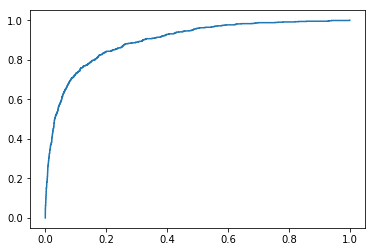

In [116]:
# evaluation metric
ev_metrics(y_test,y_pred_test,y_prob)

In [117]:
# plotting graph of sensitivity vs model
sns.barplot(x=model,y=sen)
plt.xticks(rotation=90)
plt.ylabel("sensitivity")

KeyError: ' logistic regression-Imbalanced data)'

This graph shows the sensitivity obtained from each model.
Max sensitivity obtained is form XGB with hyperparameter model.

From the bussiness prespective we need to predict custumers more likely to churn , so we need to focus on positive value 
From the above  models best positive score(sensitivity ).
Based on the evaluation metrics best model we are getting it from  **XGb with hyperparameter tuning**

With 83.6% of sensitivity score , which means this model can predict 83.6% of churn customers which is better from other models.

Hence  **XGb with hyperparameter tuning** is the best model.
